In [29]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from matplotlib.ticker import PercentFormatter


In [30]:
#Reading given csv file
uber_df = pd.read_csv(r'D:\research work\course materials\Dataset\Uber\Uber Request Data.csv')
uber_df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [31]:
#Changing column name for easy access 
uber_df.rename({'Request id':'RequestId', 'Pickup point':'PickupPoint', 'Driver id':'DriverId', 'Request timestamp':'RequestTimestamp', 'Drop timestamp':'DropTimestamp'}, axis=1, inplace =True)
uber_df.columns

Index(['RequestId', 'PickupPoint', 'DriverId', 'Status', 'RequestTimestamp',
       'DropTimestamp'],
      dtype='object')

In [32]:
#finding null values
uber_df.isnull().sum()

RequestId              0
PickupPoint            0
DriverId            2650
Status                 0
RequestTimestamp       0
DropTimestamp       3914
dtype: int64

In [33]:
#finding all the columns information
uber_df.info()
uber_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
RequestId           6745 non-null int64
PickupPoint         6745 non-null object
DriverId            4095 non-null float64
Status              6745 non-null object
RequestTimestamp    6745 non-null object
DropTimestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


,RequestId,DriverId
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [34]:
#check whether Driverid is null only for 'no cars available' status 
uber_df.loc[(uber_df.Status !='No Cars Available')&(uber_df.DriverId.isnull())].shape[0]

0

In [35]:
#check whether any Droptimestamp is null for successfully completed Trip
uber_df.loc[(uber_df.Status =='Trip Completed')&(uber_df.DropTimestamp.isnull())].shape[0]


0

In [36]:
#change PickupPoint and Status column as Categorical form for easy access
uber_df['PickupPoint'] =pd.Categorical(uber_df.PickupPoint)
uber_df['Status'] = pd.Categorical(uber_df.Status)

In [37]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
RequestId           6745 non-null int64
PickupPoint         6745 non-null category
DriverId            4095 non-null float64
Status              6745 non-null category
RequestTimestamp    6745 non-null object
DropTimestamp       2831 non-null object
dtypes: category(2), float64(1), int64(1), object(2)
memory usage: 224.2+ KB


In [38]:
#change requesttimestamp and droptimestamp datatype in a proper date format and display day as first
uber_df.RequestTimestamp = pd.to_datetime(uber_df.RequestTimestamp,dayfirst=True)
uber_df.DropTimestamp = pd.to_datetime(uber_df.DropTimestamp,dayfirst=True)


In [39]:
# check whether month and day is displaying correctly.checking all the rows are having 
# July month as this dataset is for only July 2016 period
uber_df.loc[uber_df.RequestTimestamp.dt.month== 7].shape[0]

6745

In [40]:
# check whether month and day is displaying correctly.checking all the rows are having 
# July month as this dataset is for only July 2016 period
uber_df.loc[uber_df.RequestTimestamp.dt.month!= 7].shape[0]

0

In [41]:
uber_df.head(10)

,RequestId,PickupPoint,DriverId,Status,RequestTimestamp,DropTimestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00


In [42]:
#create derived column 'Session' from RequestTimestamp as timeslot for further analysis
uber_df['Session'] = pd.cut(pd.to_datetime(uber_df['RequestTimestamp']).dt.hour,[-1,3,7,11,15,17,19,24],labels=['LateNight[00:00-3:59]','EarlyMorning[4:00-7:59]','Morning[8:00-11:59]','Afternoon[12:00-15:59]','Evening[16:00-17:59]','LateEvening[18:00-19:59]','Night[20:00-23:59]'])


In [43]:
#Create dervied column Trip_success_Failure for finding supply-demand gap
uber_df['Trip_Success_Failure'] = uber_df.Status.apply(lambda x: 'Success Trip' if x =='Trip Completed' else 'Failure booking')
uber_df.Trip_Success_Failure = pd.Categorical(uber_df.Trip_Success_Failure)

In [44]:
#create Requesthour from RequestTimestamp for hour basis analysis
uber_df['RequestHour'] =uber_df.RequestTimestamp.dt.hour
uber_df.RequestHour = pd.Categorical(uber_df.RequestHour)

In [45]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 9 columns):
RequestId               6745 non-null int64
PickupPoint             6745 non-null category
DriverId                4095 non-null float64
Status                  6745 non-null category
RequestTimestamp        6745 non-null datetime64[ns]
DropTimestamp           2831 non-null datetime64[ns]
Session                 6745 non-null category
Trip_Success_Failure    6745 non-null category
RequestHour             6745 non-null category
dtypes: category(5), datetime64[ns](2), float64(1), int64(1)
memory usage: 245.3 KB


In [46]:
uber_df.Status.value_counts(normalize =True)

Trip Completed       0.419718
No Cars Available    0.392884
Cancelled            0.187398
Name: Status, dtype: float64

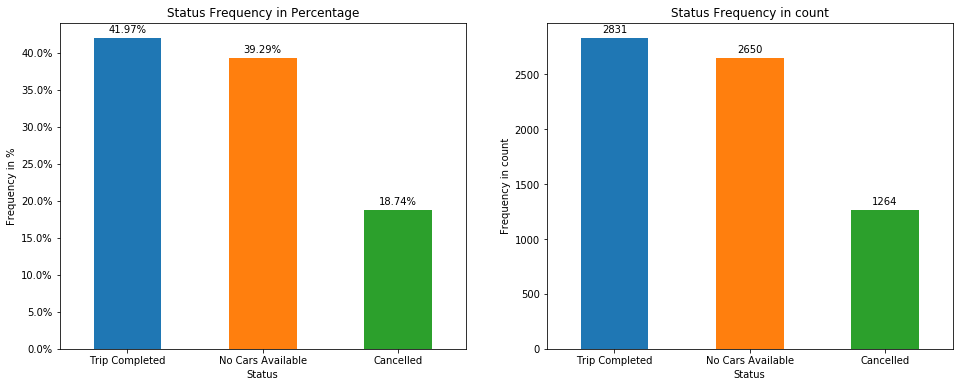

In [63]:
#Plotting frequency of status in percentage wise 
figure = plt.figure(figsize= (16,6))
plt.subplot2grid((1,2),(0,0))
ax =uber_df.Status.value_counts(normalize =True).plot(kind='bar')
plt.xlabel('Status')
plt.ylabel('Frequency in %')
plt.title('Status Frequency in Percentage')
plt.xticks(rotation=0)
(y_bottom, y_top) = ax.get_ylim()
y_height = y_top - y_bottom
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

for bar in ax.patches:
    height = bar.get_height()
    label_position = height + (y_height * 0.01)
    ax.text(bar.get_x() + bar.get_width()/2., label_position,'{0:.2%}'.format(height),ha='center', va='bottom')    

#Plotting frequency of status in count wise
plt.subplot2grid((1,2),(0,1))
ax =uber_df.Status.value_counts().plot(kind='bar')
plt.xlabel('Status')
plt.ylabel('Frequency in count')
plt.title('Status Frequency in count')
plt.xticks(rotation=0)
(y_bottom, y_top) = ax.get_ylim()
y_height = y_top - y_bottom

for bar in ax.patches:
    height = bar.get_height()
    label_position = height + (y_height * 0.01)
    ax.text(bar.get_x() + bar.get_width()/2., label_position,height,ha='center', va='bottom')    


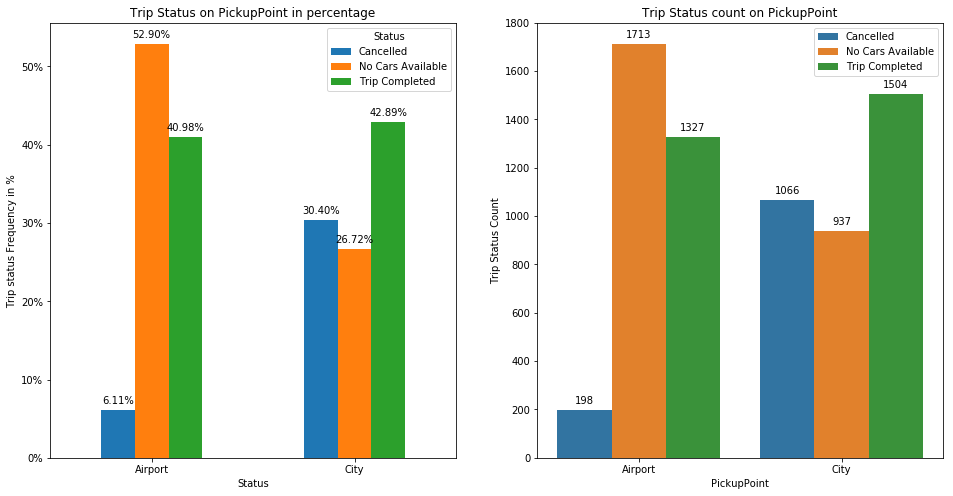

In [62]:
#plotting Frequency of status based on pickuppoint in % wise
figure = plt.figure(figsize= (16,8))
ax=plt.subplot2grid((1,2),(0,0))

freq_df = uber_df.groupby(['PickupPoint'])['Status'].value_counts().unstack()
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
ax =pct_df.plot(kind="bar",ax = ax)
plt.xlabel('Status')
plt.ylabel('Trip status Frequency in %')
plt.title('Trip Status on PickupPoint in percentage')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(rotation=0)
(y_bottom, y_top) = ax.get_ylim()
y_height = y_top - y_bottom
for bar in ax.patches:
    height = bar.get_height()
    label_position = height + (y_height * 0.01)
    ax.text(bar.get_x() + bar.get_width()/2., label_position,'{0:.2%}'.format(height),ha='center', va='bottom')    

#plotting Frequency of status based on pickuppoint in count wise
ax=plt.subplot2grid((1,2),(0,1))
ax =sns.countplot(x='PickupPoint',hue='Status',data = uber_df)
plt.title('Trip Status count on PickupPoint')
plt.ylabel('Trip Status Count')
plt.legend(loc='upper left')
(y_bottom, y_top) = ax.get_ylim()
y_height = y_top - y_bottom
plt.legend(loc='upper right')
for bar in ax.patches:
    height = bar.get_height()
    label_position = height + (y_height * 0.01)
    ax.text(bar.get_x() + bar.get_width()/2., label_position,height,ha='center', va='bottom')    

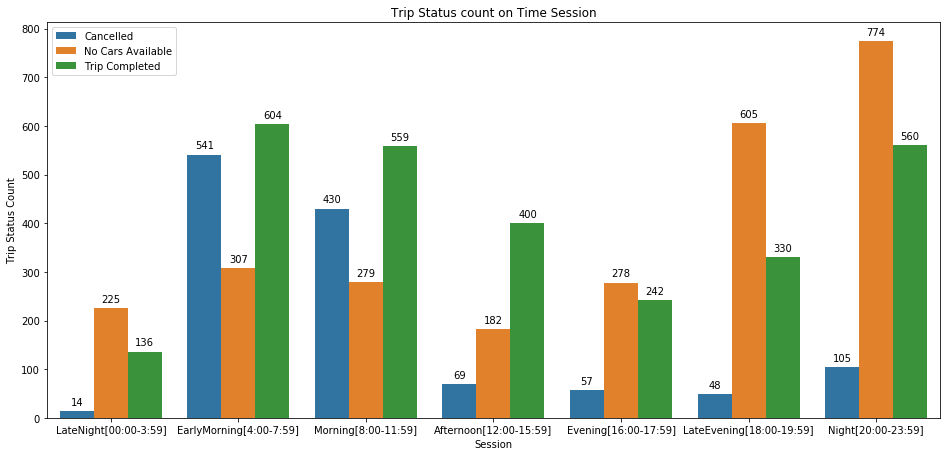

In [61]:
#plotting frequency of status in each timeslot count wise
figure = plt.figure(figsize=(16,16))
plt.subplot2grid((2,2),(0,0),colspan =2)
ax =sns.countplot(x='Session',hue='Status',data = uber_df)
plt.title('Trip Status count on Time Session')
plt.ylabel('Trip Status Count')
plt.legend(loc='upper left')
(y_bottom, y_top) = ax.get_ylim()
y_height = y_top - y_bottom

for bar in ax.patches:
    height = bar.get_height()
    label_position = height + (y_height * 0.01)
    ax.text(bar.get_x() + bar.get_width()/2., label_position,height,ha='center', va='bottom') 
    


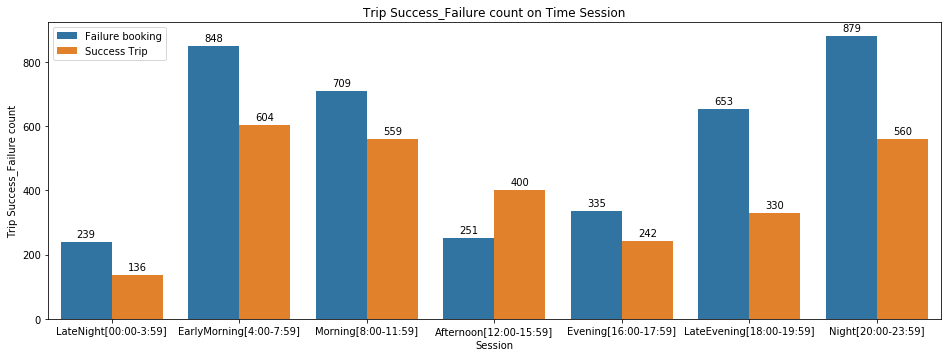

In [60]:
#plotting supply-demand gap for each session in count wise
figure = plt.figure(figsize=(16,12))
plt.subplot2grid((2,2),(0,0),colspan =2)
ax =sns.countplot(x='Session',hue='Trip_Success_Failure',data = uber_df)
plt.title('Trip Success_Failure count on Time Session')
plt.ylabel('Trip Success_Failure count')
plt.legend(loc='upper left')
(y_bottom, y_top) = ax.get_ylim()
y_height = y_top - y_bottom

for bar in ax.patches:
    height = bar.get_height()
    label_position = height + (y_height * 0.01)
    ax.text(bar.get_x() + bar.get_width()/2., label_position,height,ha='center', va='bottom') 


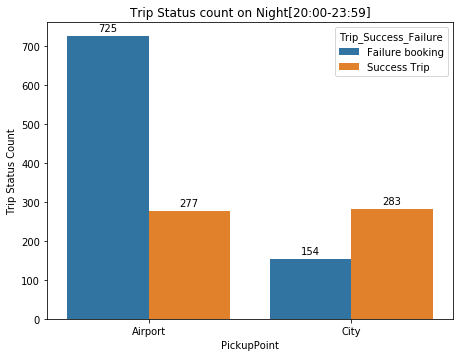

In [59]:
#plotting supply-demand gap in the night[20:00-23:59]
NightFilter =uber_df.loc[uber_df.Session =='Night[20:00-23:59]']
figure = plt.figure(figsize=(16,12))
plt.subplot2grid((2,2),(0,0))
ax =sns.countplot(x='PickupPoint',hue='Trip_Success_Failure',data = NightFilter)
plt.title('Trip Status count on Night[20:00-23:59]')
plt.ylabel('Trip Status Count')

(y_bottom, y_top) = ax.get_ylim()
y_height = y_top - y_bottom

for bar in ax.patches:
    height = bar.get_height()
    label_position = height + (y_height * 0.01)
    ax.text(bar.get_x() + bar.get_width()/2., label_position,height,ha='center', va='bottom') 

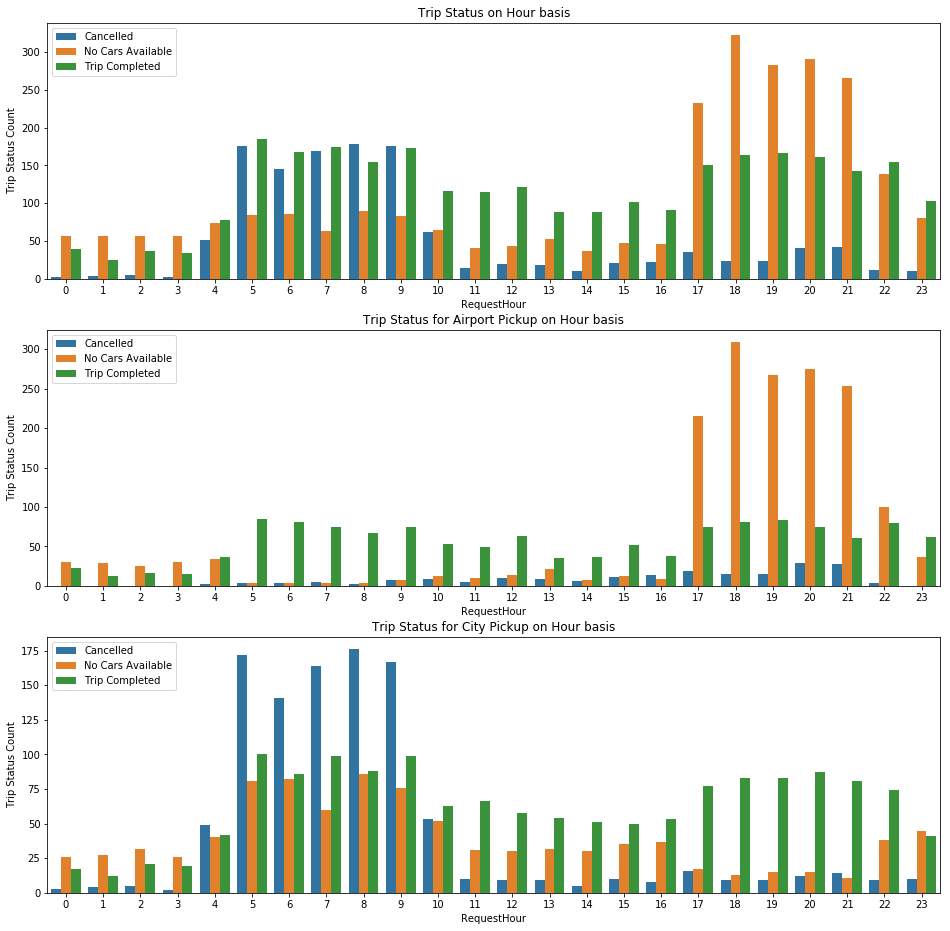

In [58]:
#plotting Trip status on hour basis
figure = plt.figure(figsize=(16,16))
plt.subplot2grid((3,2),(0,0),colspan =2)

ax =sns.countplot(x='RequestHour',hue='Status',data = uber_df)
plt.title('Trip Status on Hour basis')
plt.ylabel('Trip Status Count')
plt.legend(loc='upper left')
(y_bottom, y_top) = ax.get_ylim()
y_height = y_top - y_bottom

#plotting Trip status on hour basis in Airport pickup
plt.subplot2grid((3,2),(1,0),colspan =2)
AirportPickupFilter = uber_df.loc[uber_df.PickupPoint=='Airport']
ax =sns.countplot(x='RequestHour',hue='Status',data = AirportPickupFilter)
plt.title('Trip Status for Airport Pickup on Hour basis')
plt.ylabel('Trip Status Count')
plt.legend(loc='upper left')
(y_bottom, y_top) = ax.get_ylim()
y_height = y_top - y_bottom

#plotting Trip status on hour basis in City pickup
plt.subplot2grid((3,2),(2,0),colspan =2)
CityPickupFilter = uber_df.loc[uber_df.PickupPoint=='City']
ax =sns.countplot(x='RequestHour',hue='Status',data = CityPickupFilter)
plt.title('Trip Status for City Pickup on Hour basis')
plt.ylabel('Trip Status Count')
plt.legend(loc='upper left')


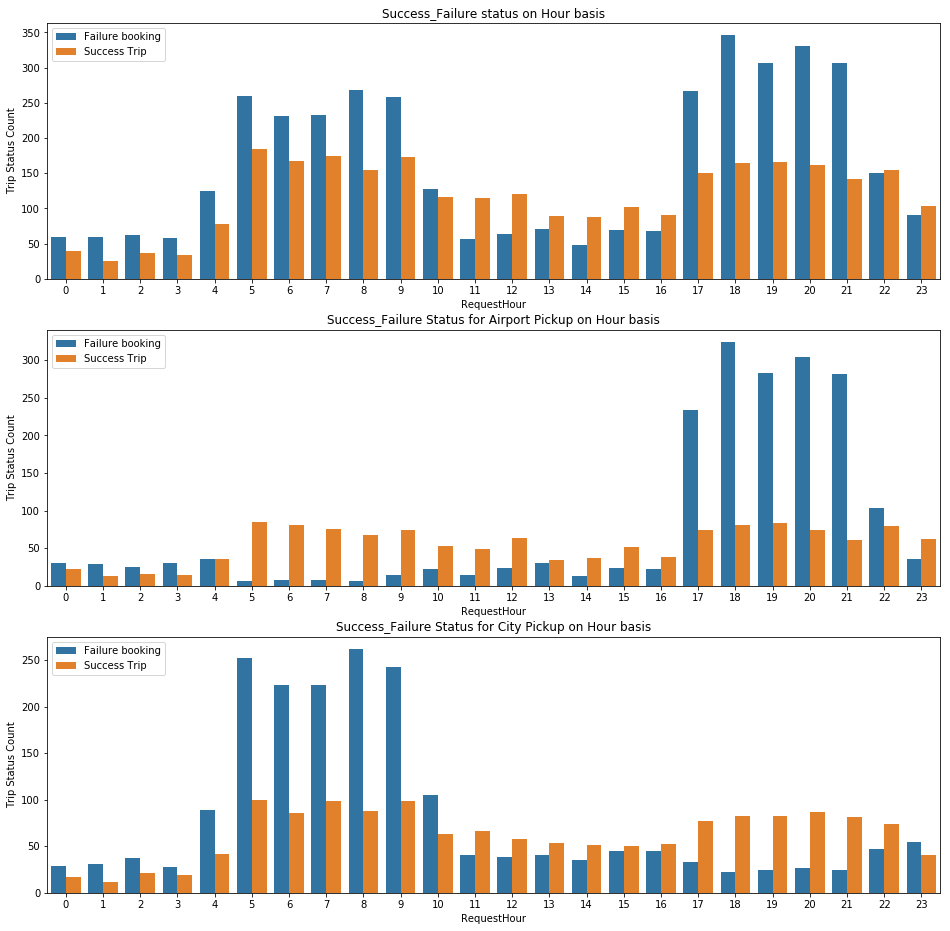

In [56]:
#plotting supply demand gap on hour basis
figure = plt.figure(figsize=(16,16))
plt.subplot2grid((3,2),(0,0),colspan =2)

ax =sns.countplot(x='RequestHour',hue='Trip_Success_Failure',data = uber_df)
plt.title('Success_Failure status on Hour basis')
plt.ylabel('Trip Status Count')
plt.legend(loc='upper left')
(y_bottom, y_top) = ax.get_ylim()
y_height = y_top - y_bottom

#plotting supply demand gap on hour basis in Airport pickup    
plt.subplot2grid((3,2),(1,0),colspan =2)
AirportPickupFilter = uber_df.loc[uber_df.PickupPoint=='Airport']
ax =sns.countplot(x='RequestHour',hue='Trip_Success_Failure',data = AirportPickupFilter)
plt.title('Success_Failure Status for Airport Pickup on Hour basis')
plt.ylabel('Trip Status Count')
plt.legend(loc='upper left')
(y_bottom, y_top) = ax.get_ylim()
y_height = y_top - y_bottom

#plotting supply demand gap on hour basis in City pickup  
plt.subplot2grid((3,2),(2,0),colspan =2)
CityPickupFilter = uber_df.loc[uber_df.PickupPoint=='City']
ax =sns.countplot(x='RequestHour',hue='Trip_Success_Failure',data = CityPickupFilter)
plt.title('Success_Failure Status for City Pickup on Hour basis')
plt.ylabel('Trip Status Count')
plt.legend(loc='upper left')


In [57]:
uber_df.to_csv(r'D:\research work\course materials\Dataset\Uber\UberTableau.csv',index=False)